In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import load_img , img_to_array
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.image import resize
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import os


# Loading Spectrogram Images

In [48]:
Image_Path= "/kaggle/input/gtzan-dataset-music-genre-classification/Data/images_original"

data = []
labels = []

for genre in os.listdir(Image_Path):
    genre_folder = os.path.join(Image_Path, genre)
    for img_file in os.listdir(genre_folder):
        img_path = os.path.join(genre_folder, img_file)
        img = load_img(img_path,target_size=(224, 224))
        img_array = img_to_array(img)
        data.append(img_array)
        labels.append(genre)
        
data = np.array(data)
labels = np.array(labels)

In [49]:
data.shape

(999, 224, 224, 3)

In [50]:
len(set(labels)) # Number of unique Genres

10

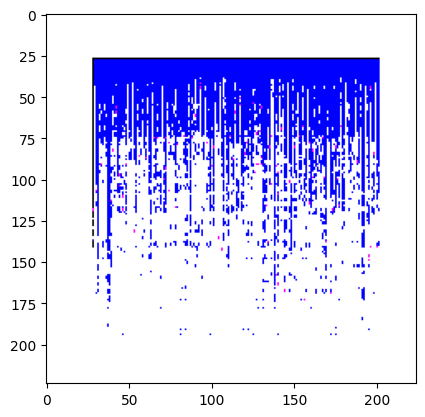

In [51]:
plt.imshow(data[1])

## Preprocessing Images

#### Normalization

In [52]:
data = data.astype("float32") / 255.0

#### Encoding Labels

In [53]:
le = LabelEncoder()
labels_encoded = le.fit_transform(labels) 
labels_encoded = to_categorical(labels_encoded)

#### Making Splits of the data

In [54]:
X = data
y = labels_encoded

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Building the Neural Network

In [56]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

In [57]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(10, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

In [58]:
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [59]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50)

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 19s 353ms/step - accuracy: 0.1109 - loss: 2.7029 - val_accuracy: 0.2300 - val_loss: 2.1887
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.1682 - loss: 2.2747 - val_accuracy: 0.3500 - val_loss: 2.0294
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.2171 - loss: 2.1547 - val_accuracy: 0.4600 - val_loss: 1.9255
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.2879 - loss: 2.0067 - val_accuracy: 0.4550 - val_loss: 1.8376
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.3508 - loss: 1.8929 - val_accuracy: 0.4850 - val_loss: 1.7696
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.3483 - loss: 1.8587 - val_accuracy: 0.4800 - val_loss: 1.7026
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.3984 - loss: 1.7483 - val_accuracy: 0.4850 - val_loss: 1.6513
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.3990 - loss: 1.7399 - val_accuracy: 0.5150 -

In [61]:
loss, acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc:.2f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6557 - loss: 1.1609
Test Accuracy: 0.63
